In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('PowerPlant.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [6]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
# Separate input and output features

In [8]:
X=df.drop(labels='PE',axis=1)
Y=df[['PE']]

In [9]:
# Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss=StandardScaler()

In [12]:
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [13]:
X

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427
...,...,...,...,...
9563,-0.608049,-0.423838,-0.245699,-0.025958
9564,1.846298,1.860689,-0.498289,-0.930783
9565,-0.491303,-0.862958,0.158445,0.366521
9566,-0.268547,0.437876,0.896008,1.461763


In [14]:
# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [17]:
xtrain.shape

(7654, 4)

In [18]:
xtest.shape

(1914, 4)

In [19]:
# Build the neural network

In [20]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [22]:
# Initialize the model
model=Sequential()

# Add input layers
model.add(Input(shape=(xtrain.shape[1],)))

# Add hidden layer 1
model.add(Dense(units=64, activation='relu'))

# Add hidden layer 2
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='linear'))

In [23]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [24]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=50)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 201419.8906 - mae: 448.4314 - val_loss: 148366.9375 - val_mae: 384.4397
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109533.1953 - mae: 320.8004 - val_loss: 23589.3008 - val_mae: 130.3812
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19348.6484 - mae: 118.1631 - val_loss: 11343.8682 - val_mae: 89.5708
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9158.9609 - mae: 80.2374 - val_loss: 5421.1494 - val_mae: 61.6286
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4367.3311 - mae: 55.2589 - val_loss: 2500.1331 - val_mae: 41.1577
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1943.8658 - mae: 36.1818 - val_loss: 1271.1511 - val_mae: 29.0245
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1078.0826 - mae: 26.1487 - val_loss: 732.5381 - val_mae: 21.5660
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 606.4058 - mae: 19.3592 - val_loss: 464.3833 

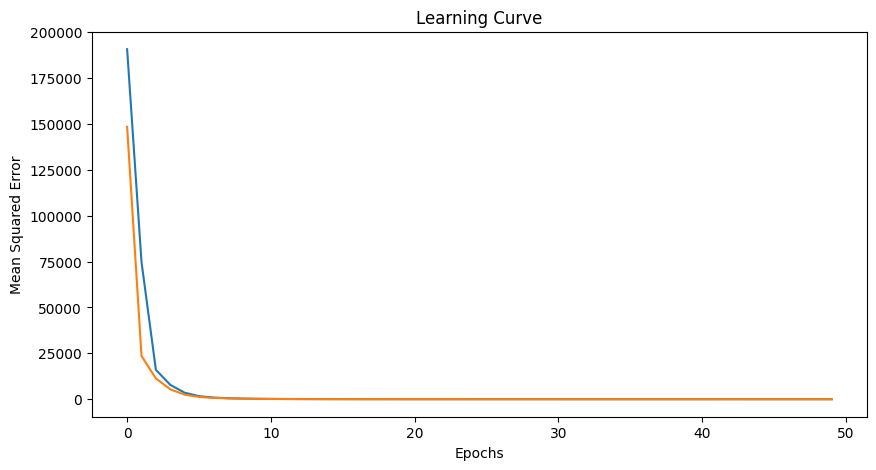

In [25]:
# Plot the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

In [26]:
# Evaluate model

In [27]:
model.evaluate(xtrain,ytrain)

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.0745 - mae: 3.3626


[19.410917282104492, 3.3857758045196533]

In [28]:
model.evaluate(xtest,ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.8060 - mae: 3.4115


[19.79628562927246, 3.4627201557159424]

In [29]:
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [30]:
ytrain.head()

,PE
9083,451.51
506,434.45
1880,433.73
2011,442.81
7097,438.97


In [31]:
from sklearn.metrics import r2_score

In [32]:
tr_score=r2_score(tr_pred,ytrain)
print(tr_score)

0.9357685446739197


In [33]:
ts_score=r2_score(ts_pred,ytest)
print(ts_score)

0.9322553873062134
